In [835]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [836]:
def roc_and_confusin(y_test, y_pred, y_pred_proba):
    from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
    import matplotlib.pyplot as plt

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()

    print('AUC:', roc_auc_score(y_test, y_pred_proba))

    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))

In [837]:
#importing the datasets and creating the full one
dataset_original_mutation = pd.read_csv('csv_data\mutation.csv')
dataset_original_mutation['Mutation'] = 1
dataset_original_no_mutation = pd.read_csv('csv_data/no_mutation.csv')
dataset_original_no_mutation['Mutation'] = 0
dataset_original = pd.concat([dataset_original_mutation, dataset_original_no_mutation]).drop(columns=['filename'])
#shuffling the dataset
dataset_original = dataset_original.sample(frac=1).reset_index(drop=True)

dataset_over700 = pd.read_csv('csv_data\OVER700_anonym.csv')
dataset_over700['Mutation'] = 0

dataset_less300 = pd.read_csv('csv_data\LESS300_anonym.csv')
dataset_less300['Mutation'] = 1

dataset_generated_mut = pd.read_csv('csv_data\mutation_augmented.csv')
dataset_generated_mut['Mutation'] = 1

dataset_generated_no_mut = pd.read_csv('csv_data/no_mutation_augmented.csv')
dataset_generated_no_mut['Mutation'] = 0

dataset_generated = pd.concat([dataset_generated_mut, dataset_generated_no_mut])
dataset_generated.drop(columns=['filename'], inplace=True)
dataset_generated = dataset_generated.sample(frac=1).reset_index(drop=True)


#dataset = pd.concat([dataset_original, dataset_generated])

dataset = dataset_original

#dataset

In [838]:
#dataset_generated

In [839]:
tmp1 = dataset_less300["diagnostics_Image-original_Mean"]
tmp2 = dataset_less300["diagnostics_Mask-original_VoxelNum"]
tmp3 = dataset_over700["diagnostics_Image-original_Mean"]
tmp4 = dataset_over700["diagnostics_Mask-original_VoxelNum"]

dataset_less300 =  dataset_less300[dataset_less300.columns.drop(list(dataset_less300.filter(regex='diagnostics')))]
dataset_over700 =  dataset_over700[dataset_over700.columns.drop(list(dataset_over700.filter(regex='diagnostics')))]

dataset_less300 = pd.concat([tmp1, tmp2, dataset_less300], axis=1)
dataset_over700 = pd.concat([tmp3, tmp4, dataset_over700], axis=1)

dataset_less300 = dataset_less300.drop(columns=['name', 'mutation'])
dataset_over700 = dataset_over700.drop(columns=['name', 'mutation'])

#dataset_less300

In [840]:
#dataset_over700

In [841]:
from sklearn.feature_selection import SelectKBest, chi2

# Разделение данных на признаки и целевую переменную
X = dataset.drop(columns=['Mutation'])
y = dataset['Mutation']

k = 20  # Количество признаков для выбора
selector = SelectKBest(k=k)
X_new = selector.fit_transform(X, y)

# Получение имен выбранных признаков
selected_features = X.columns[selector.get_support()]

#print("Selected features:")
#print(selected_features)

#Добавим к selected_features Mutation и Generated
selected_features = selected_features.insert(0, 'Mutation')
#Оставим только выбранные признаки
dataset1 = dataset[selected_features]
dataset_less300 = dataset_less300[selected_features]
dataset_over700 = dataset_over700[selected_features]
dataset_generated = dataset_generated[selected_features]

In [842]:
X = dataset1.drop(['Mutation'], axis=1)
y = dataset1['Mutation']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

dataset_smote = pd.concat([X_res, y_res], axis=1)

#Уберем из X_res и y_res строчки ктоторые есть в X_train и y_train
mask = dataset_smote.isin(dataset.to_dict(orient='list')).all(axis=1)
common_rows = dataset_smote[mask]

#Уберем dataset_smote строчки ктоторые есть в common_rows
mask = dataset_smote.isin(common_rows.to_dict(orient='list')).all(axis=1)
dataset_smote = dataset_smote[~mask]

X_train, X_test, y_train, y_test = train_test_split(dataset1.drop(['Mutation'], axis=1), dataset1['Mutation'], test_size=0.33, random_state=42)


#Добавляем smote
X_train = pd.concat([X_train, dataset_smote.drop(['Mutation'], axis=1)])
y_train = pd.concat([y_train, dataset_smote['Mutation']])

#Добавляем generated
X_train = pd.concat([X_train, dataset_generated.drop(['Mutation'], axis=1)])
y_train = pd.concat([y_train, dataset_generated['Mutation']])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(358, 20) (358,)
(30, 20) (30,)


In [843]:
#Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



X_less300 = dataset_less300.drop(['Mutation'], axis=1)
y_less300 = dataset_less300['Mutation']

X_less300 = sc.transform(X_less300)

X_over700 = dataset_over700.drop(['Mutation'], axis=1)
y_over700 = dataset_over700['Mutation']

X_over700 = sc.transform(X_over700)


0:	learn: 0.6439681	total: 4.4ms	remaining: 4.39s
100:	learn: 0.0448953	total: 263ms	remaining: 2.34s
200:	learn: 0.0123632	total: 468ms	remaining: 1.86s
300:	learn: 0.0067231	total: 683ms	remaining: 1.58s
400:	learn: 0.0050192	total: 882ms	remaining: 1.32s
500:	learn: 0.0042131	total: 1.07s	remaining: 1.07s
600:	learn: 0.0035656	total: 1.27s	remaining: 841ms
700:	learn: 0.0032287	total: 1.46s	remaining: 621ms
800:	learn: 0.0030133	total: 1.64s	remaining: 408ms
900:	learn: 0.0029500	total: 1.83s	remaining: 201ms
999:	learn: 0.0028283	total: 2.01s	remaining: 0us
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.90      0.86      0.88        21

    accuracy                           0.83        30
   macro avg       0.80      0.82      0.81        30
weighted avg       0.84      0.83      0.84        30

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       

c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.

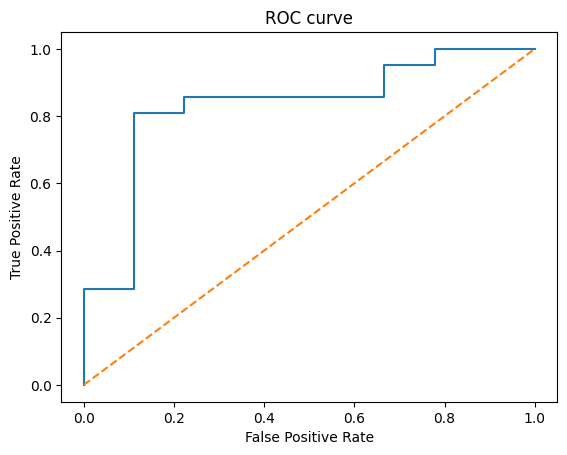

AUC: 0.8306878306878306
Confusion matrix:
[[ 7  2]
 [ 3 18]]


In [844]:
#catboost
from catboost import CatBoostClassifier

classifier_cb = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=100, random_state=42)

classifier_cb.fit(X_train, y_train)

y_pred = classifier_cb.predict(X_test)

print(classification_report(y_test, y_pred))


y_less300_pred = classifier_cb.predict(X_less300)
print(classification_report(y_less300, y_less300_pred))

y_over700_pred = classifier_cb.predict(X_over700)
print(classification_report(y_over700, y_over700_pred))

roc_and_confusin(y_test, y_pred, classifier_cb.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.94      0.81      0.87        21

    accuracy                           0.83        30
   macro avg       0.81      0.85      0.82        30
weighted avg       0.86      0.83      0.84        30

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.54      0.70        57

    accuracy                           0.54        57
   macro avg       0.50      0.27      0.35        57
weighted avg       1.00      0.54      0.70        57

              precision    recall  f1-score   support

           0       1.00      0.48      0.65        46
           1       0.00      0.00      0.00         0

    accuracy                           0.48        46
   macro avg       0.50      0.24      0.32        46
weighted avg       1.00      0.48      0.65        46



c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.

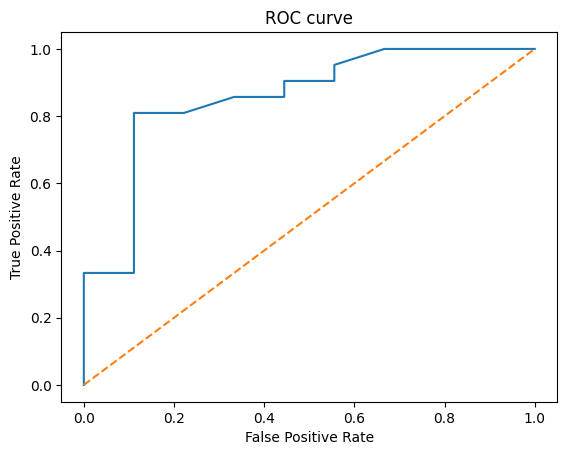

AUC: 0.8571428571428571
Confusion matrix:
[[ 8  1]
 [ 4 17]]


In [845]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, class_weight='balanced')

classifier_rf.fit(X_train, y_train)

y_pred = classifier_rf.predict(X_test)

print(classification_report(y_test, y_pred))


y_less300_pred = classifier_rf.predict(X_less300)
print(classification_report(y_less300, y_less300_pred))

y_over700_pred = classifier_rf.predict(X_over700)
print(classification_report(y_over700, y_over700_pred))

roc_and_confusin(y_test, y_pred, classifier_rf.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.60      0.33      0.43         9
           1       0.76      0.90      0.83        21

    accuracy                           0.73        30
   macro avg       0.68      0.62      0.63        30
weighted avg       0.71      0.73      0.71        30

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.54      0.70        57

    accuracy                           0.54        57
   macro avg       0.50      0.27      0.35        57
weighted avg       1.00      0.54      0.70        57

              precision    recall  f1-score   support

           0       1.00      0.37      0.54        46
           1       0.00      0.00      0.00         0

    accuracy                           0.37        46
   macro avg       0.50      0.18      0.27        46
weighted avg       1.00      0.37      0.54        46



c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.

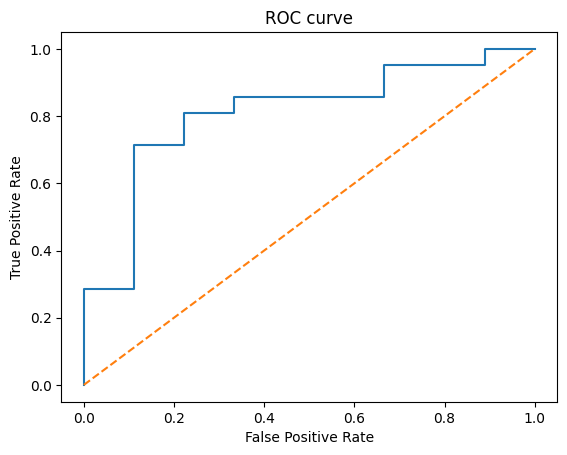

AUC: 0.8095238095238095
Confusion matrix:
[[ 3  6]
 [ 2 19]]


In [846]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_gb = GradientBoostingClassifier(random_state=42)

classifier_gb.fit(X_train, y_train)

y_pred = classifier_gb.predict(X_test)

print(classification_report(y_test, y_pred))


y_less300_pred = classifier_gb.predict(X_less300)
print(classification_report(y_less300, y_less300_pred))

y_over700_pred = classifier_gb.predict(X_over700)
print(classification_report(y_over700, y_over700_pred))

roc_and_confusin(y_test, y_pred, classifier_gb.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.73      0.90      0.81        21

    accuracy                           0.70        30
   macro avg       0.62      0.56      0.56        30
weighted avg       0.66      0.70      0.66        30

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.60      0.75        57

    accuracy                           0.60        57
   macro avg       0.50      0.30      0.37        57
weighted avg       1.00      0.60      0.75        57

              precision    recall  f1-score   support

           0       1.00      0.48      0.65        46
           1       0.00      0.00      0.00         0

    accuracy                           0.48        46
   macro avg       0.50      0.24      0.32        46
weighted avg       1.00      0.48      0.65        46



c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.

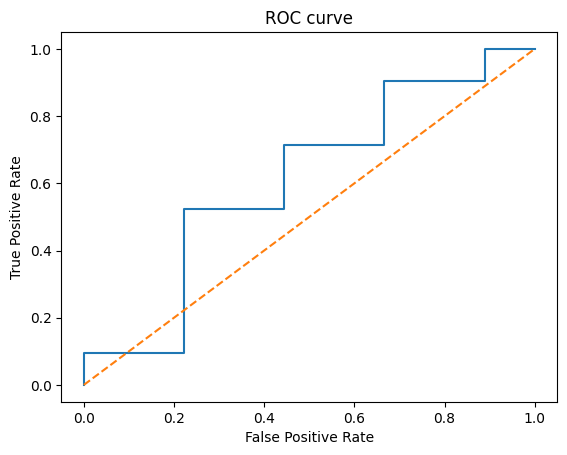

AUC: 0.6084656084656085
Confusion matrix:
[[ 2  7]
 [ 2 19]]


In [847]:
#Training the Logistic Regression model on the Training set
classifier_logreg = LogisticRegression(random_state=42)

classifier_logreg.fit(X_train, y_train)

y_pred = classifier_logreg.predict(X_test)

print(classification_report(y_test, y_pred))



y_less300_pred = classifier_logreg.predict(X_less300)
print(classification_report(y_less300, y_less300_pred))

y_over700_pred = classifier_logreg.predict(X_over700)
print(classification_report(y_over700, y_over700_pred))

roc_and_confusin(y_test, y_pred, classifier_logreg.predict_proba(X_test)[:, 1])

              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.70      0.90      0.79        21

    accuracy                           0.67        30
   macro avg       0.52      0.51      0.48        30
weighted avg       0.59      0.67      0.60        30

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.65      0.79        57

    accuracy                           0.65        57
   macro avg       0.50      0.32      0.39        57
weighted avg       1.00      0.65      0.79        57

              precision    recall  f1-score   support

           0       1.00      0.41      0.58        46
           1       0.00      0.00      0.00         0

    accuracy                           0.41        46
   macro avg       0.50      0.21      0.29        46
weighted avg       1.00      0.41      0.58        46



c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.

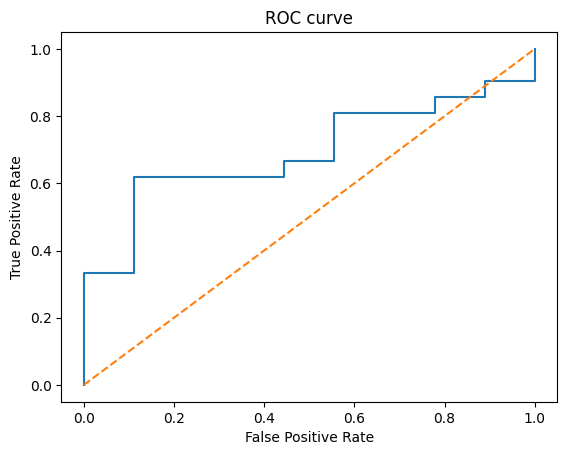

AUC: 0.6931216931216931
Confusion matrix:
[[ 1  8]
 [ 2 19]]


In [848]:
from sklearn.svm import SVC

classifier_svm = SVC(random_state=42)

classifier_svm.fit(X_train, y_train)

y_pred = classifier_svm.predict(X_test)

print(classification_report(y_test, y_pred))


y_less300_pred = classifier_svm.predict(X_less300)
print(classification_report(y_less300, y_less300_pred))

y_over700_pred = classifier_svm.predict(X_over700)
print(classification_report(y_over700, y_over700_pred))

roc_and_confusin(y_test, y_pred, classifier_svm.decision_function(X_test))